# Feature Engineering

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

In [2]:
train_data = pd.DataFrame()
train_data

Empty DataFrame
Columns: []
Index: []

## Загрузка данных

In [3]:
home_data = pd.read_csv("./../../../data/hpc_train.csv")
home_data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

## Обработка колонки `LotFrontage`

```
LotFrontage: Linear feet of street connected to property
```

Можно попробовать заменить пустые значения на 0 (предположу, что отсутствие значения значит отсутствие соединения с улицей).

In [4]:
column_name = 'LotFrontage'
current_column = home_data[column_name].copy()
current_column

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

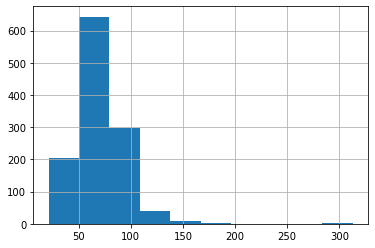

In [5]:
current_column.hist()
current_column.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,   0.,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

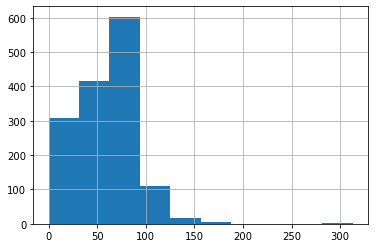

In [6]:
current_column.fillna(0.0, inplace=True)
current_column
current_column.hist()
current_column.unique()

In [7]:
train_data[column_name] = current_column
train_data

LotFrontage
0            65.0
1            80.0
2            68.0
3            60.0
4            84.0
...           ...
1455         62.0
1456         85.0
1457         66.0
1458         68.0
1459         75.0

[1460 rows x 1 columns]

## Обработка колонки `Alley`

```
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
```

Можно заменить `NA` на `"Empty"`, а затем использовать `Dummy`.

In [8]:
column_name = 'Alley'
current_column = home_data[column_name].copy()
current_column

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: Alley, Length: 1460, dtype: object

array([nan, 'Grvl', 'Pave'], dtype=object)

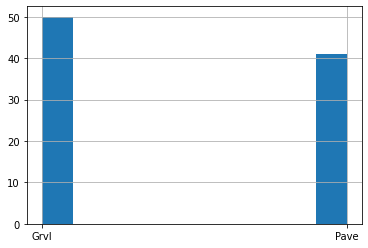

In [9]:
current_column.hist()
current_column.unique()

array(['Empty', 'Grvl', 'Pave'], dtype=object)

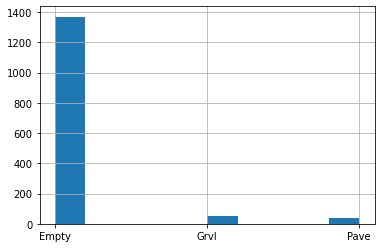

In [10]:
current_column.fillna('Empty', inplace=True)
current_column
current_column.hist()
current_column.unique()

In [11]:
dummies = pd.get_dummies(current_column, prefix=column_name)
dummies

Alley_Empty  Alley_Grvl  Alley_Pave
0               1           0           0
1               1           0           0
2               1           0           0
3               1           0           0
4               1           0           0
...           ...         ...         ...
1455            1           0           0
1456            1           0           0
1457            1           0           0
1458            1           0           0
1459            1           0           0

[1460 rows x 3 columns]

In [12]:
train_data = train_data.join(dummies)
train_data

LotFrontage  Alley_Empty  Alley_Grvl  Alley_Pave
0            65.0            1           0           0
1            80.0            1           0           0
2            68.0            1           0           0
3            60.0            1           0           0
4            84.0            1           0           0
...           ...          ...         ...         ...
1455         62.0            1           0           0
1456         85.0            1           0           0
1457         66.0            1           0           0
1458         68.0            1           0           0
1459         75.0            1           0           0

[1460 rows x 4 columns]

## Обработка колонки `MasVnrType`

```
MasVnrType: Masonry veneer type

       BrkCmn   Brick Common
       BrkFace  Brick Face
       CBlock   Cinder Block
       None     None
       Stone    Stone
```

Заменю все недостающие значения на тип `None`. Хотя, возможно, там было что-то другое, но так как пустых значений довольно много, то это не должно очень сильно повлиять.

А затем ипользовать `Dummy`.

TODO: Подумать над более логичной заменой пустых значений.

In [13]:
column_name = 'MasVnrType'
current_column = home_data[column_name].copy()
current_column

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1460, dtype: object

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

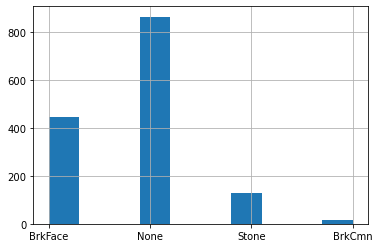

In [14]:
current_column.hist()
current_column.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

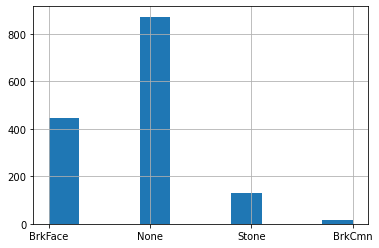

In [15]:
current_column.fillna('None', inplace=True)
current_column
current_column.hist()
current_column.unique()

In [16]:
dummies = pd.get_dummies(current_column, prefix=column_name)
dummies

MasVnrType_BrkCmn  MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone
0                     0                   1                0                 0
1                     0                   0                1                 0
2                     0                   1                0                 0
3                     0                   0                1                 0
4                     0                   1                0                 0
...                 ...                 ...              ...               ...
1455                  0                   0                1                 0
1456                  0                   0                0                 1
1457                  0                   0                1                 0
1458                  0                   0                1                 0
1459                  0                   0                1                 0

[1460 rows x 4 columns]

In [17]:
train_data = train_data.join(dummies)
train_data

LotFrontage  Alley_Empty  Alley_Grvl  Alley_Pave  MasVnrType_BrkCmn  \
0            65.0            1           0           0                  0   
1            80.0            1           0           0                  0   
2            68.0            1           0           0                  0   
3            60.0            1           0           0                  0   
4            84.0            1           0           0                  0   
...           ...          ...         ...         ...                ...   
1455         62.0            1           0           0                  0   
1456         85.0            1           0           0                  0   
1457         66.0            1           0           0                  0   
1458         68.0            1           0           0                  0   
1459         75.0            1           0           0                  0   

      MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  
0                      1                0                 0  
1                      0                1                 0  
2                      1                0                 0  
3                      0                1                 0  
4                      1                0                 0  
...                  ...              ...               ...  
1455                   0                1                 0  
1456                   0                0                 1  
1457                   0                1                 0  
1458                   0                1                 0  
1459                   0                1                 0  

[1460 rows x 8 columns]

## Обработка колонки `MasVnrArea`

```
MasVnrArea: Masonry veneer area in square feet
```

Заменю все недостающие значения на `0.0`. Хотя, возможно, там было что-то другое, но так как пустых значений довольно много, то это не должно очень сильно повлиять.


TODO: Подумать над более логичной заменой пустых значений. Судя по всему отсутствующие значения одновременно отсутствуют и в`MasVnrType` и в `MasVnrArea`.

In [18]:
column_name = 'MasVnrArea'
current_column = home_data[column_name].copy()
current_column

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

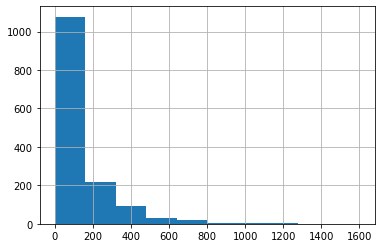

In [19]:
current_column.hist()
current_column.unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

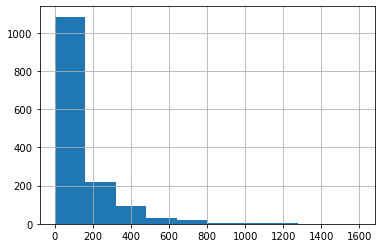

In [20]:
current_column.fillna(0.0, inplace=True)
current_column
current_column.hist()
current_column.unique()

In [21]:
train_data[column_name] = current_column
train_data

LotFrontage  Alley_Empty  Alley_Grvl  Alley_Pave  MasVnrType_BrkCmn  \
0            65.0            1           0           0                  0   
1            80.0            1           0           0                  0   
2            68.0            1           0           0                  0   
3            60.0            1           0           0                  0   
4            84.0            1           0           0                  0   
...           ...          ...         ...         ...                ...   
1455         62.0            1           0           0                  0   
1456         85.0            1           0           0                  0   
1457         66.0            1           0           0                  0   
1458         68.0            1           0           0                  0   
1459         75.0            1           0           0                  0   

      MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  MasVnrArea  
0                      1                0                 0       196.0  
1                      0                1                 0         0.0  
2                      1                0                 0       162.0  
3                      0                1                 0         0.0  
4                      1                0                 0       350.0  
...                  ...              ...               ...         ...  
1455                   0                1                 0         0.0  
1456                   0                0                 1       119.0  
1457                   0                1                 0         0.0  
1458                   0                1                 0         0.0  
1459                   0                1                 0         0.0  

[1460 rows x 9 columns]

## Обработка колонки `BsmtQual`
```
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches)
       NA	No Basement
```

Заменю все `nan` значения на `NA`, так как уже в документации так и указано.

Так как это порядковые пременные, то можно применить `LabelEncoder`.
Допустим, что No Basement = минимальный.

In [22]:
column_name = 'BsmtQual'
current_column = home_data[column_name].copy()
current_column

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: object

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

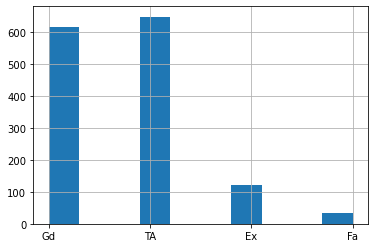

In [23]:
current_column.hist()
current_column.unique()

array(['Gd', 'TA', 'Ex', 'NA', 'Fa'], dtype=object)

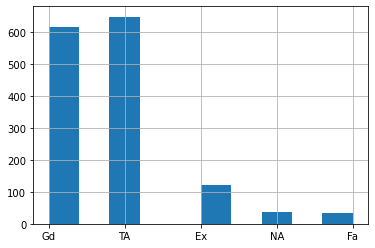

In [24]:
current_column.fillna('NA', inplace=True)
current_column
current_column.hist()
current_column.unique()

In [25]:
labels_ordered = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']

le_ex_gd_ta_fa_po_no = LabelEncoder()
le_ex_gd_ta_fa_po_no.fit(labels_ordered)
le_ex_gd_ta_fa_po_no.classes_

array(['Ex', 'Fa', 'Gd', 'NA', 'Po', 'TA'], dtype='<U2')

In [26]:
le_encoded = le_ex_gd_ta_fa_po_no.transform(current_column)
le_encoded

array([2, 2, 2, ..., 5, 5, 5])

In [27]:
train_data[column_name] = le_encoded
train_data

LotFrontage  Alley_Empty  Alley_Grvl  Alley_Pave  MasVnrType_BrkCmn  \
0            65.0            1           0           0                  0   
1            80.0            1           0           0                  0   
2            68.0            1           0           0                  0   
3            60.0            1           0           0                  0   
4            84.0            1           0           0                  0   
...           ...          ...         ...         ...                ...   
1455         62.0            1           0           0                  0   
1456         85.0            1           0           0                  0   
1457         66.0            1           0           0                  0   
1458         68.0            1           0           0                  0   
1459         75.0            1           0           0                  0   

      MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  MasVnrArea  \
0                      1                0                 0       196.0   
1                      0                1                 0         0.0   
2                      1                0                 0       162.0   
3                      0                1                 0         0.0   
4                      1                0                 0       350.0   
...                  ...              ...               ...         ...   
1455                   0                1                 0         0.0   
1456                   0                0                 1       119.0   
1457                   0                1                 0         0.0   
1458                   0                1                 0         0.0   
1459                   0                1                 0         0.0   

      BsmtQual  
0            2  
1            2  
2            2  
3            5  
4            2  
...        ...  
1455         2  
1456         2  
1457         5  
1458         5  
1459         5  

[1460 rows x 10 columns]

## Обработка колонки `BsmtCond`

```
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
```

Заменю все `nan` значения на `NA`, так как уже в документации так и указано.

Так как это порядковые пременные, то можно применить `LabelEncoder`.
Допустим, что No Basement = минимальный.

In [28]:
column_name = 'BsmtCond'
current_column = home_data[column_name].copy()
current_column

0       TA
1       TA
2       TA
3       Gd
4       TA
        ..
1455    TA
1456    TA
1457    Gd
1458    TA
1459    TA
Name: BsmtCond, Length: 1460, dtype: object

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

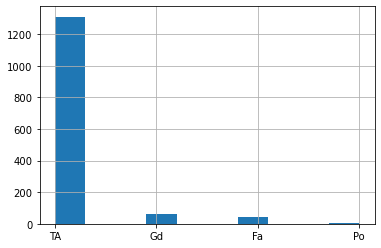

In [29]:
current_column.hist()
current_column.unique()

array(['TA', 'Gd', 'NA', 'Fa', 'Po'], dtype=object)

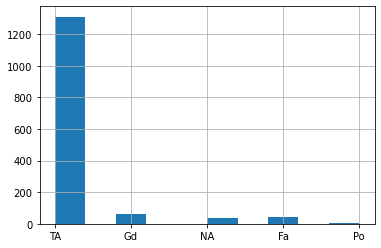

In [30]:
current_column.fillna('NA', inplace=True)
current_column
current_column.hist()
current_column.unique()

In [31]:
le_encoded = le_ex_gd_ta_fa_po_no.transform(current_column)
le_encoded

array([5, 5, 5, ..., 2, 5, 5])

In [32]:
train_data[column_name] = le_encoded
train_data

LotFrontage  Alley_Empty  Alley_Grvl  Alley_Pave  MasVnrType_BrkCmn  \
0            65.0            1           0           0                  0   
1            80.0            1           0           0                  0   
2            68.0            1           0           0                  0   
3            60.0            1           0           0                  0   
4            84.0            1           0           0                  0   
...           ...          ...         ...         ...                ...   
1455         62.0            1           0           0                  0   
1456         85.0            1           0           0                  0   
1457         66.0            1           0           0                  0   
1458         68.0            1           0           0                  0   
1459         75.0            1           0           0                  0   

      MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  MasVnrArea  \
0                      1                0                 0       196.0   
1                      0                1                 0         0.0   
2                      1                0                 0       162.0   
3                      0                1                 0         0.0   
4                      1                0                 0       350.0   
...                  ...              ...               ...         ...   
1455                   0                1                 0         0.0   
1456                   0                0                 1       119.0   
1457                   0                1                 0         0.0   
1458                   0                1                 0         0.0   
1459                   0                1                 0         0.0   

      BsmtQual  BsmtCond  
0            2         5  
1            2         5  
2            2         5  
3            5         2  
4            2         5  
...        ...       ...  
1455         2         5  
1456         2         5  
1457         5         2  
1458         5         5  
1459         5         5  

[1460 rows x 11 columns]

## Обработка колонки `BsmtExposure`
```
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
```

Заменю все `nan` значения на `NA`, так как уже в документации так и указано.

Так как это порядковые пременные, то можно применить `LabelEncoder`.

In [33]:
column_name = 'BsmtExposure'
current_column = home_data[column_name].copy()
current_column

0       No
1       Gd
2       Mn
3       No
4       Av
        ..
1455    No
1456    No
1457    No
1458    Mn
1459    No
Name: BsmtExposure, Length: 1460, dtype: object

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

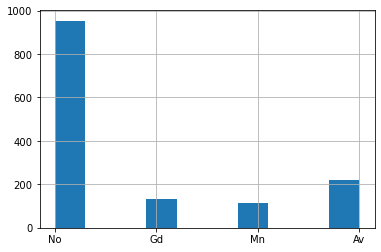

In [34]:
current_column.hist()
current_column.unique()

array(['No', 'Gd', 'Mn', 'Av', 'NA'], dtype=object)

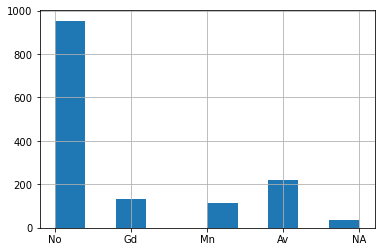

In [35]:
current_column.fillna('NA', inplace=True)
current_column
current_column.hist()
current_column.unique()

In [36]:
labels_ordered = ['Gd', 'Av', 'Mn', 'No', 'NA']

le_gd_av_mn_no_na = LabelEncoder()
le_gd_av_mn_no_na.fit(labels_ordered)
le_gd_av_mn_no_na.classes_

array(['Av', 'Gd', 'Mn', 'NA', 'No'], dtype='<U2')

In [37]:
le_encoded = le_gd_av_mn_no_na.transform(current_column)
le_encoded

array([4, 1, 2, ..., 4, 2, 4])

In [38]:
train_data[column_name] = le_encoded
train_data

LotFrontage  Alley_Empty  Alley_Grvl  Alley_Pave  MasVnrType_BrkCmn  \
0            65.0            1           0           0                  0   
1            80.0            1           0           0                  0   
2            68.0            1           0           0                  0   
3            60.0            1           0           0                  0   
4            84.0            1           0           0                  0   
...           ...          ...         ...         ...                ...   
1455         62.0            1           0           0                  0   
1456         85.0            1           0           0                  0   
1457         66.0            1           0           0                  0   
1458         68.0            1           0           0                  0   
1459         75.0            1           0           0                  0   

      MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  MasVnrArea  \
0                      1                0                 0       196.0   
1                      0                1                 0         0.0   
2                      1                0                 0       162.0   
3                      0                1                 0         0.0   
4                      1                0                 0       350.0   
...                  ...              ...               ...         ...   
1455                   0                1                 0         0.0   
1456                   0                0                 1       119.0   
1457                   0                1                 0         0.0   
1458                   0                1                 0         0.0   
1459                   0                1                 0         0.0   

      BsmtQual  BsmtCond  BsmtExposure  
0            2         5             4  
1            2         5             1  
2            2         5             2  
3            5         2             4  
4            2         5             0  
...        ...       ...           ...  
1455         2         5             4  
1456         2         5             4  
1457         5         2             4  
1458         5         5             2  
1459         5         5             4  

[1460 rows x 12 columns]

## Обработка колонки `BsmtFinType1`
```
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
```

Заменю все `nan` значения на `NA`, так как уже в документации так и указано.

Так как это порядковые пременные, то можно применить `LabelEncoder`.

In [39]:
column_name = 'BsmtFinType1'
current_column = home_data[column_name].copy()
current_column

0       GLQ
1       ALQ
2       GLQ
3       ALQ
4       GLQ
       ... 
1455    Unf
1456    ALQ
1457    GLQ
1458    GLQ
1459    BLQ
Name: BsmtFinType1, Length: 1460, dtype: object

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

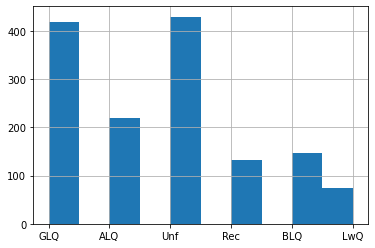

In [40]:
current_column.hist()
current_column.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'NA', 'LwQ'], dtype=object)

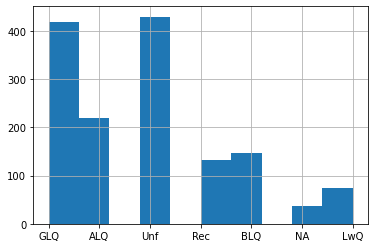

In [41]:
current_column.fillna('NA', inplace=True)
current_column
current_column.hist()
current_column.unique()

In [42]:
labels_ordered = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA']

le_glq_alq_blq_rec_lwq_unf_na = LabelEncoder()
le_glq_alq_blq_rec_lwq_unf_na.fit(labels_ordered)
le_glq_alq_blq_rec_lwq_unf_na.classes_

array(['ALQ', 'BLQ', 'GLQ', 'LwQ', 'NA', 'Rec', 'Unf'], dtype='<U3')

In [43]:
le_encoded = le_glq_alq_blq_rec_lwq_unf_na.transform(current_column)
le_encoded

array([2, 0, 2, ..., 2, 2, 1])

In [44]:
train_data[column_name] = le_encoded
train_data

LotFrontage  Alley_Empty  Alley_Grvl  Alley_Pave  MasVnrType_BrkCmn  \
0            65.0            1           0           0                  0   
1            80.0            1           0           0                  0   
2            68.0            1           0           0                  0   
3            60.0            1           0           0                  0   
4            84.0            1           0           0                  0   
...           ...          ...         ...         ...                ...   
1455         62.0            1           0           0                  0   
1456         85.0            1           0           0                  0   
1457         66.0            1           0           0                  0   
1458         68.0            1           0           0                  0   
1459         75.0            1           0           0                  0   

      MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  MasVnrArea  \
0                      1                0                 0       196.0   
1                      0                1                 0         0.0   
2                      1                0                 0       162.0   
3                      0                1                 0         0.0   
4                      1                0                 0       350.0   
...                  ...              ...               ...         ...   
1455                   0                1                 0         0.0   
1456                   0                0                 1       119.0   
1457                   0                1                 0         0.0   
1458                   0                1                 0         0.0   
1459                   0                1                 0         0.0   

      BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  
0            2         5             4             2  
1            2         5             1             0  
2            2         5             2             2  
3            5         2             4             0  
4            2         5             0             2  
...        ...       ...           ...           ...  
1455         2         5             4             6  
1456         2         5             4             0  
1457         5         2             4             2  
1458         5         5             2             2  
1459         5         5             4             1  

[1460 rows x 13 columns]

## Обработка колонки `BsmtFinType2`
```
BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
```

Заменю все `nan` значения на `NA`, так как уже в документации так и указано.

Так как это порядковые пременные, то можно применить `LabelEncoder`.

In [45]:
column_name = 'BsmtFinType2'
current_column = home_data[column_name].copy()
current_column

0       Unf
1       Unf
2       Unf
3       Unf
4       Unf
       ... 
1455    Unf
1456    Rec
1457    Unf
1458    Rec
1459    LwQ
Name: BsmtFinType2, Length: 1460, dtype: object

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

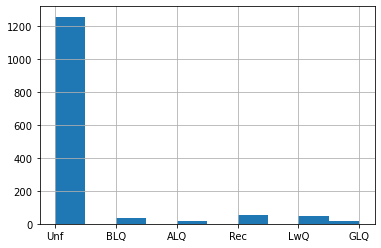

In [46]:
current_column.hist()
current_column.unique()

array(['Unf', 'BLQ', 'NA', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

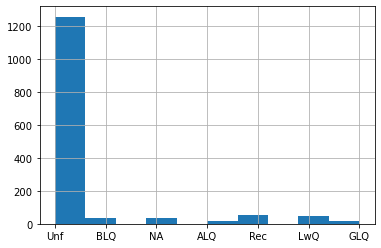

In [47]:
current_column.fillna('NA', inplace=True)
current_column
current_column.hist()
current_column.unique()

In [48]:
le_encoded = le_glq_alq_blq_rec_lwq_unf_na.transform(current_column)
le_encoded

array([6, 6, 6, ..., 6, 5, 3])

In [49]:
train_data[column_name] = le_encoded
train_data

LotFrontage  Alley_Empty  Alley_Grvl  Alley_Pave  MasVnrType_BrkCmn  \
0            65.0            1           0           0                  0   
1            80.0            1           0           0                  0   
2            68.0            1           0           0                  0   
3            60.0            1           0           0                  0   
4            84.0            1           0           0                  0   
...           ...          ...         ...         ...                ...   
1455         62.0            1           0           0                  0   
1456         85.0            1           0           0                  0   
1457         66.0            1           0           0                  0   
1458         68.0            1           0           0                  0   
1459         75.0            1           0           0                  0   

      MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  MasVnrArea  \
0                      1                0                 0       196.0   
1                      0                1                 0         0.0   
2                      1                0                 0       162.0   
3                      0                1                 0         0.0   
4                      1                0                 0       350.0   
...                  ...              ...               ...         ...   
1455                   0                1                 0         0.0   
1456                   0                0                 1       119.0   
1457                   0                1                 0         0.0   
1458                   0                1                 0         0.0   
1459                   0                1                 0         0.0   

      BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  
0            2         5             4             2             6  
1            2         5             1             0             6  
2            2         5             2             2             6  
3            5         2             4             0             6  
4            2         5             0             2             6  
...        ...       ...           ...           ...           ...  
1455         2         5             4             6             6  
1456         2         5             4             0             5  
1457         5         2             4             2             6  
1458         5         5             2             2             5  
1459         5         5             4             1             3  

[1460 rows x 14 columns]

## Обработка колонки `Electrical`
```
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
```

Так как тут всего 1 значение `nan`, то заменю его на самое распространенное.

И так как это порядковое значение, то можно использовать `LabelEncoder`. 

Так как значение `Mix` встречается всего 1 раз, то буду считать его худшим (самое непопулярное по крайней мере).

In [50]:
column_name = 'Electrical'
current_column = home_data[column_name].copy()
current_column

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object

<AxesSubplot:>

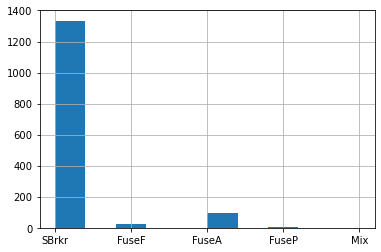

In [51]:
current_column_unique = current_column.unique()
current_column_unique
current_column.hist()

In [52]:
for column_type in current_column_unique:
    print(f"{column_type}: {(current_column == column_type).sum()}")

SBrkr: 1334
FuseF: 27
FuseA: 94
FuseP: 3
Mix: 1
nan: 0


array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

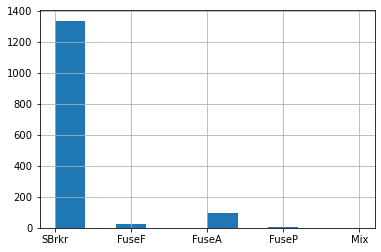

In [53]:
current_column.fillna('SBrkr', inplace=True)
current_column
current_column.hist()
current_column.unique()

In [54]:
labels_ordered = ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix']

le_electrical = LabelEncoder()
le_electrical.fit(labels_ordered)
le_electrical.classes_

array(['FuseA', 'FuseF', 'FuseP', 'Mix', 'SBrkr'], dtype='<U5')

In [55]:
le_encoded = le_electrical.transform(current_column)
le_encoded

array([4, 4, 4, ..., 4, 0, 4])

In [56]:
train_data[column_name] = le_encoded
train_data

LotFrontage  Alley_Empty  Alley_Grvl  Alley_Pave  MasVnrType_BrkCmn  \
0            65.0            1           0           0                  0   
1            80.0            1           0           0                  0   
2            68.0            1           0           0                  0   
3            60.0            1           0           0                  0   
4            84.0            1           0           0                  0   
...           ...          ...         ...         ...                ...   
1455         62.0            1           0           0                  0   
1456         85.0            1           0           0                  0   
1457         66.0            1           0           0                  0   
1458         68.0            1           0           0                  0   
1459         75.0            1           0           0                  0   

      MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  MasVnrArea  \
0                      1                0                 0       196.0   
1                      0                1                 0         0.0   
2                      1                0                 0       162.0   
3                      0                1                 0         0.0   
4                      1                0                 0       350.0   
...                  ...              ...               ...         ...   
1455                   0                1                 0         0.0   
1456                   0                0                 1       119.0   
1457                   0                1                 0         0.0   
1458                   0                1                 0         0.0   
1459                   0                1                 0         0.0   

      BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  Electrical  
0            2         5             4             2             6           4  
1            2         5             1             0             6           4  
2            2         5             2             2             6           4  
3            5         2             4             0             6           4  
4            2         5             0             2             6           4  
...        ...       ...           ...           ...           ...         ...  
1455         2         5             4             6             6           4  
1456         2         5             4             0             5           4  
1457         5         2             4             2             6           4  
1458         5         5             2             2             5           0  
1459         5         5             4             1             3           4  

[1460 rows x 15 columns]

## Обработка колонки `FireplaceQu`
```
FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
```

И так как это порядковое значение, то можно использовать `LabelEncoder`. 

Заменю все `nan` значения на `NA`, так как уже в документации так и указано.

TODO: Без камина лучше, чем плохой камин?

In [57]:
column_name = 'FireplaceQu'
current_column = home_data[column_name].copy()
current_column

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

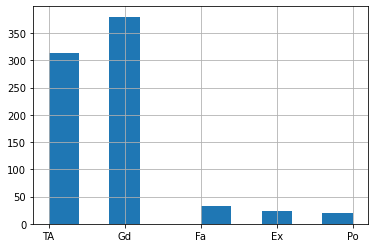

In [58]:
current_column.hist()
current_column.unique()

array(['NA', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

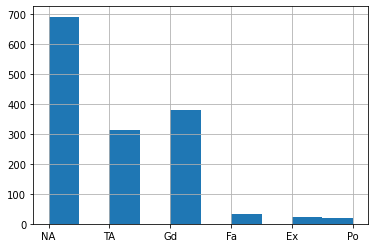

In [59]:
current_column.fillna('NA', inplace=True)
current_column
current_column.hist()
current_column.unique()

In [60]:
le_encoded = le_ex_gd_ta_fa_po_no.transform(current_column)
le_encoded

array([3, 5, 5, ..., 2, 3, 3])

In [61]:
train_data[column_name] = le_encoded
train_data

LotFrontage  Alley_Empty  Alley_Grvl  Alley_Pave  MasVnrType_BrkCmn  \
0            65.0            1           0           0                  0   
1            80.0            1           0           0                  0   
2            68.0            1           0           0                  0   
3            60.0            1           0           0                  0   
4            84.0            1           0           0                  0   
...           ...          ...         ...         ...                ...   
1455         62.0            1           0           0                  0   
1456         85.0            1           0           0                  0   
1457         66.0            1           0           0                  0   
1458         68.0            1           0           0                  0   
1459         75.0            1           0           0                  0   

      MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  MasVnrArea  \
0                      1                0                 0       196.0   
1                      0                1                 0         0.0   
2                      1                0                 0       162.0   
3                      0                1                 0         0.0   
4                      1                0                 0       350.0   
...                  ...              ...               ...         ...   
1455                   0                1                 0         0.0   
1456                   0                0                 1       119.0   
1457                   0                1                 0         0.0   
1458                   0                1                 0         0.0   
1459                   0                1                 0         0.0   

      BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
0            2         5             4             2             6   
1            2         5             1             0             6   
2            2         5             2             2             6   
3            5         2             4             0             6   
4            2         5             0             2             6   
...        ...       ...           ...           ...           ...   
1455         2         5             4             6             6   
1456         2         5             4             0             5   
1457         5         2             4             2             6   
1458         5         5             2             2             5   
1459         5         5             4             1             3   

      Electrical  FireplaceQu  
0              4            3  
1              4            5  
2              4            5  
3              4            2  
4              4            5  
...          ...          ...  
1455           4            5  
1456           4            5  
1457           4            2  
1458           0            3  
1459           4            3  

[1460 rows x 16 columns]

## Обработка колонки `GarageType`
```
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
```

Это номинальные значения, можно использовать `Dummy`.

Заменю все `nan` значения на `NA`, так как уже в документации так и указано.

TODO: Может быть на самом деле это порядковые? Что-то из этого лучше другого однозначно? Понятно, что больше 1 гаража точно лучше, чем без него, но остальные под вопросом.

In [62]:
column_name = 'GarageType'
current_column = home_data[column_name].copy()
current_column

0       Attchd
1       Attchd
2       Attchd
3       Detchd
4       Attchd
         ...  
1455    Attchd
1456    Attchd
1457    Attchd
1458    Attchd
1459    Attchd
Name: GarageType, Length: 1460, dtype: object

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

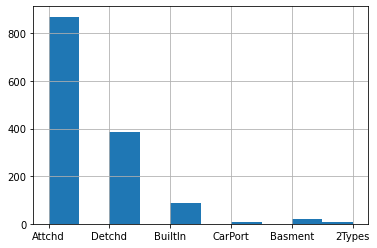

In [63]:
current_column.hist()
current_column.unique()

In [64]:
train_data.to_csv("./hpc_train_data.csv")